In [74]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os

In [75]:
path1 = '/Users/kimtaehyeong/Desktop/01_앞면_윗니 오른쪽'
os.chdir(path1)
files1 = os.listdir(path1) # 파일 폴더명 반환

data = []
for file in files1:
    f = cv2.imread(file)
    data.append(f)



In [76]:
len(data)

2687

In [77]:
# train, test 나누기
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, 
                               test_size=0.15,
                               shuffle=True,
                               random_state=42)

In [78]:
print(len(train))
print(len(test))

2283
404


In [79]:
# Train outlier data load
path1 = '/Users/kimtaehyeong/Desktop/아웃라이어'
os.chdir(path1)
files1 = os.listdir(path1)

for file in files1:
    f = cv2.imread(file)
    train.append(f)

In [80]:
path2 = '/Users/kimtaehyeong/Desktop/테스트 이상치'
os.chdir(path2)
files2 = os.listdir(path2)

for file in files2:
    f = cv2.imread(file)
    test.append(f)

In [81]:
print('Train: ', len(train))
print('Test: ', len(test))

Train:  2287
Test:  410


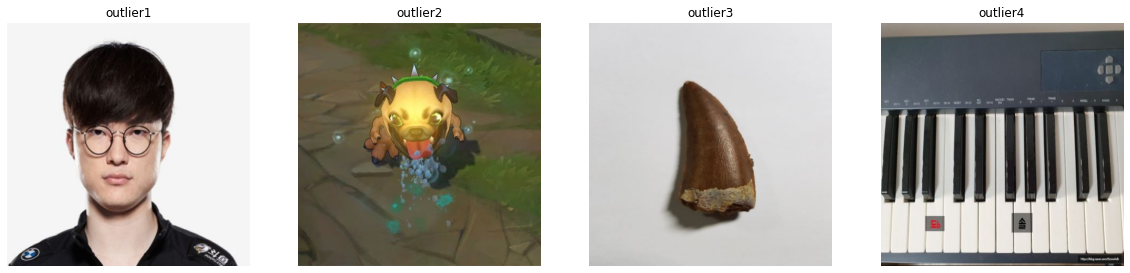

In [82]:
# Train 이상치
plt.figure(figsize=(20,8))

for i in range(1,5):
    plt.subplot(1,4,i)
    plt.imshow(cv2.cvtColor(train[-i], cv2.COLOR_BGR2RGB))
    plt.title(f'outlier{i}')
    plt.axis('off')
plt.show()

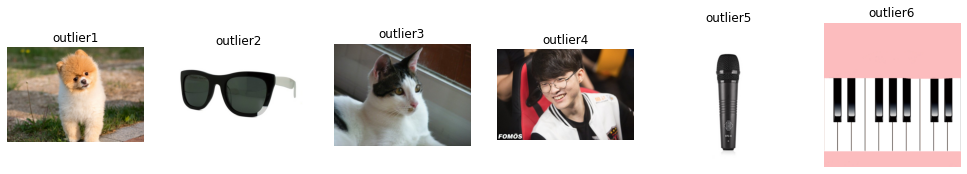

In [83]:
# test 이상치
plt.figure(figsize=(20,10))

for i in range(1,7):
    plt.subplot(1,7,i)
    plt.imshow(cv2.cvtColor(test[-i], cv2.COLOR_BGR2RGB))
    plt.title(f'outlier{i}')
    plt.axis('off')

plt.show()

In [84]:
# image resize
def image_resize(data_set, n_pixel):
    # create empty list
    resized_list = []
    # resize to n pixel 
    for i in range(len(data_set)):
        resized = cv2.resize(data_set[i], dsize=(n_pixel,n_pixel), interpolation=cv2.INTER_CUBIC)
        resized_list.append(resized)
        
    return resized_list

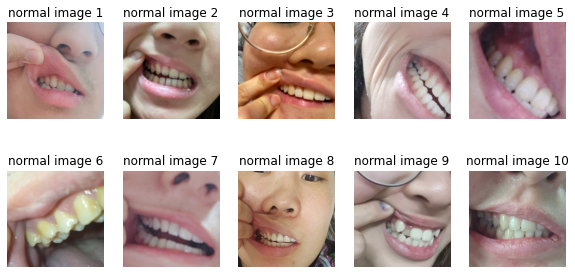

In [85]:
# 데이터 시각화
plt.figure(figsize = (10,5))

for i in range(1,10+1):
    plt.subplot(2,5,i)
    plt.imshow(cv2.cvtColor(train[i], cv2.COLOR_BGR2RGB))
    plt.title(f'normal image {i}')
    plt.axis('off')

In [86]:
train_resize_64 = image_resize(train, 64)
test_resize_64 = image_resize(test, 64)

In [87]:
train = np.array(train_resize_64)
test = np.array(test_resize_64)

valid_data=test

In [88]:
train_2 = train.reshape(len(train),-1)
test_2 = test.reshape(len(test),-1)

In [89]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_data = scaler.fit_transform(train_2)
test_data = scaler.fit_transform(test_2)


In [90]:
#MDS
from sklearn.manifold import MDS

mds = MDS(n_components=7, 
          dissimilarity='euclidean',
          metric = True,
          random_state=42)

train_data_mds = mds.fit_transform(train_data)
test_data_mds = mds.fit_transform(test_data)

In [91]:
from sklearn.ensemble import IsolationForest

iforest = IsolationForest(n_estimators=100,
                          max_samples = 'auto', 
                          max_features=3,
                          contamination=0.002,
                          random_state=42)

iforest.fit(train_data_mds)
pred= iforest.predict(test_data_mds)

In [92]:
import pandas as pd

result = pd.DataFrame(pred, columns=['value'])

In [93]:
result

,value
0,1
1,1
2,1
3,1
4,1
...,...
405,-1
406,1
407,1
408,-1


In [94]:
outlier = result[result.value==-1].index
outlier

Int64Index([404, 405, 408], dtype='int64')

/var/folders/f4/fb3b_sqx3rvc3gfr73v6ck_00000gn/T/ipykernel_7118/4237769440.py:5: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(n,n,i+1)


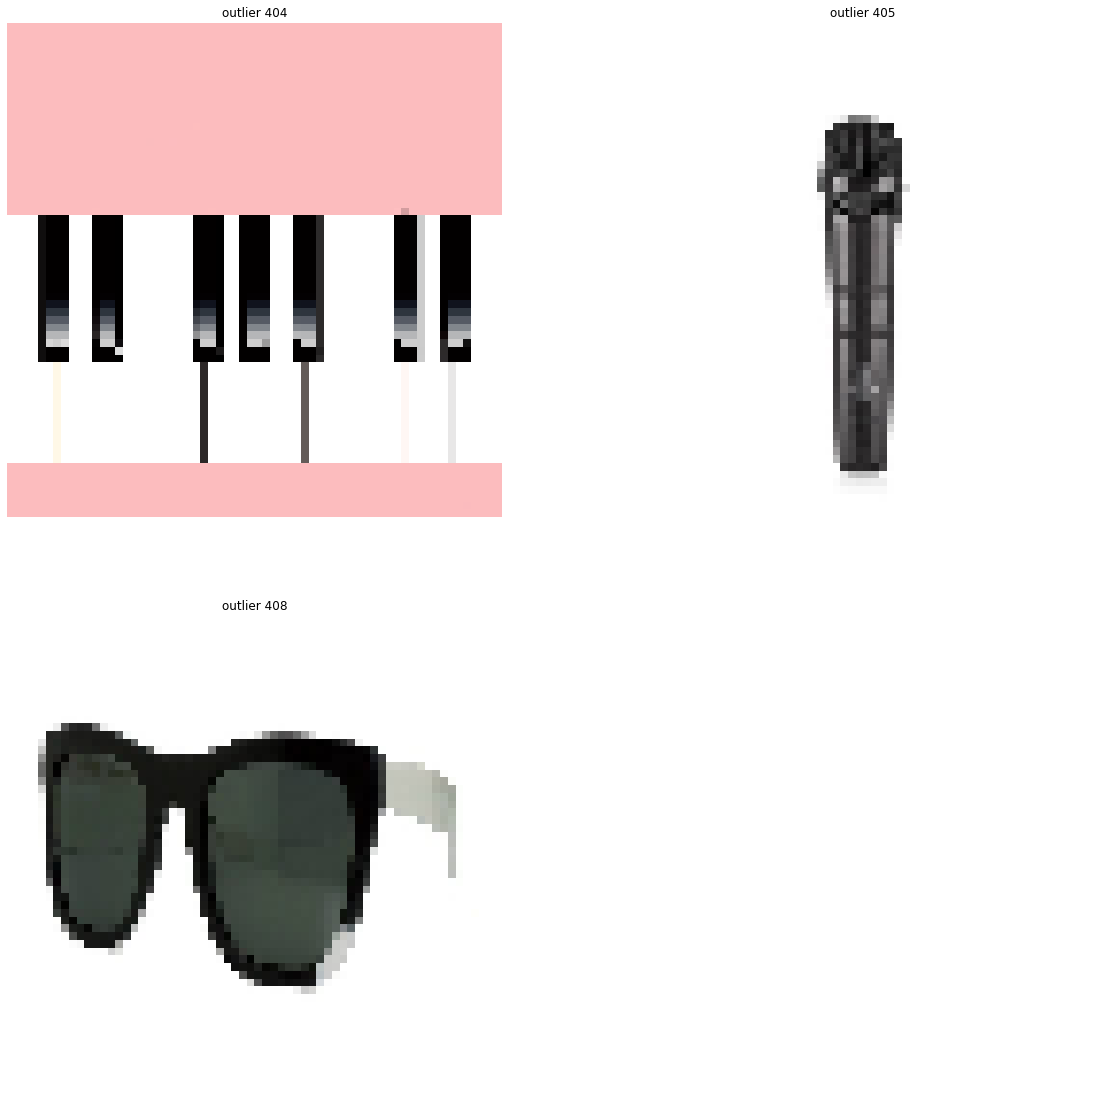

In [95]:
plt.figure(figsize=(20,20))

for i in range(len(outlier)):
    n = np.ceil(np.sqrt(len(outlier)))
    plt.subplot(n,n,i+1)
    plt.imshow(cv2.cvtColor(valid_data[outlier[i]], cv2.COLOR_BGR2RGB))
    plt.title(f'outlier {outlier[i]}')
    plt.axis('off')
    
plt.show()